In [213]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
%autoreload 2

In [225]:
# import standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# import custom modules
import StatsMod 

# set some defaults for plotting
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)

# Topic 1 - Working with probabilities

The aim of this exercise is review some basic ideas about probability. There is necessarily some mathematics involved in doing this, but your emphasis should be on general concepts and not technical details. Within
the bulk of this course, we will work with the **frequentist** definition of probabilities. This is the 
most familiar and intuitive approach. Later, we will also consider the **Bayesian** point of view which is radically different in outlook. In practice, however, for many simple problems the two view points lead to similar outcomes.


## Probabilities as relative frequencies

A workable definition for the probability of an event, $A$, is the **relative frequency** with which it occurs. 
We write this quantity $P(A)$. Such probabilities provide a mathematical model for what happens  when we repeat an "identical experiment". Despite our best efforts, there will always be factors beyond our control within the experiment, and so the same measurements are not produced each time. If, however, many such experiments are conducted we find that the relative frequency of any particular outcome does tend towards a definite value. For those familiar with quantum mechanics, this is precisely the sense in which probabilities enter into that theory. 

To gain a practical understanding of this definition, we can use a random number generation within a computer the simulate an idealised experiment. This is done within the code below in the case of an experiment that returns a single real number. The `IdealisedExperiment` class is defined within `StatsMod.py`, with its details deliberately obscured for the moment. All we need know is that from an instance of this class we can use the method `Sample`
to return the result of $n$ repetitions of the experiment. 




In [226]:
# Set up the experiment.
experiment  = StatsMod.IdealisedExperiment()

# Set the number of runs.
nSample = 4

# Generate the results. 
results = experiment.Sample(nSample)

# Print out the results.
for pair in enumerate(results):
    print("Value from experiment %3i = %8.4f " % pair)


Value from experiment   0 =   2.2740 
Value from experiment   1 =   1.7497 
Value from experiment   2 =   2.2113 
Value from experiment   3 =   1.3257 


Suppose we wish to determine the probabiliy that the experiment value lies within an interval $I = [a,b]$. The notation $[a,b]$ means the set of real numbers lying between $a$ and $b$ including the end points. We can do this by computing the relative frequency that this condition is met for some finite set of repetitions. The function
below implements this idea.

In [227]:
def RelativeFrequencyForInterval(a,b,results):
    inInterval = len(list(filter(lambda x : a <= x and x <= b,results)))
    total = len(results)
    return inInterval / total

Within the code below you can investigate what happens as the choice of interval and sample size is varied.  

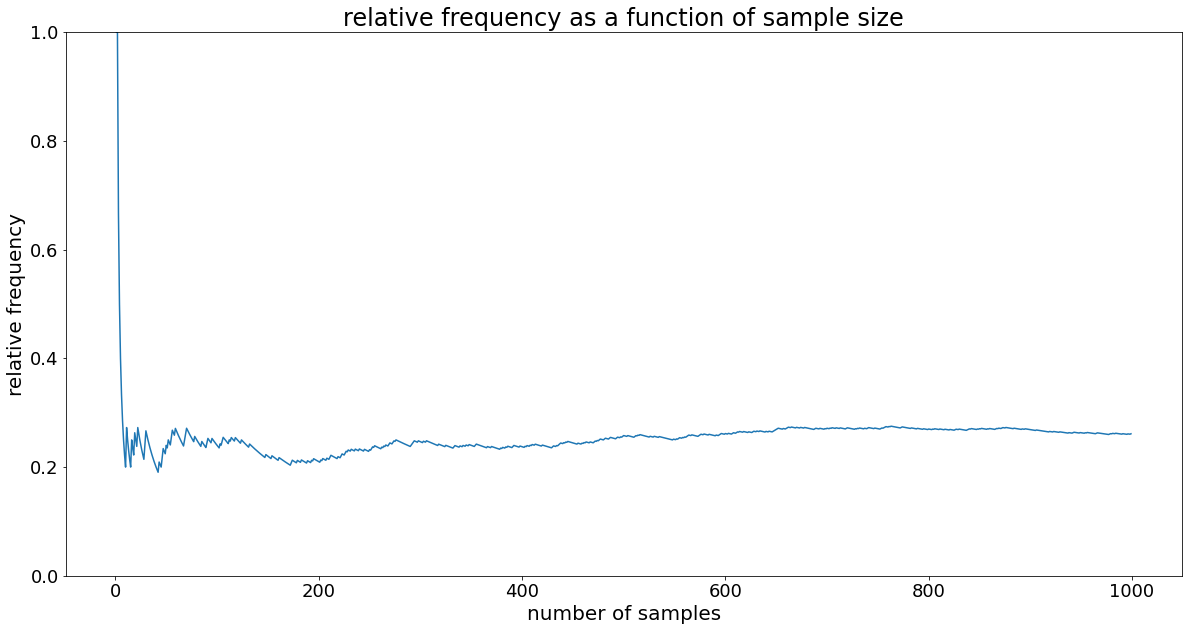

In [228]:
# Set the maximum sample size
nSample = 1000

# Get the results
results = experiment.Sample(nSample)

# Set the interval
a = 1.9
b = 2.1

# Compute the relative frequency for an increasing set of sample sizes
samples = []
relativeFrequencies = []
for n in range(1,nSample):
    samples.append(n)
    relativeFrequencies.append(RelativeFrequencyForInterval(a,b,results[:n]))

# plot the results
plt.plot(samples,relativeFrequencies)
plt.ylim([0,1])
plt.xlabel("number of samples")
plt.ylabel("relative frequency")
plt.title("relative frequency as a function of sample size")
plt.show()

## Terminology for probabilities

It will be useful to introduce some standard terminology. A **probability space** forms a mathematical model for a idealised repeatable experiment. The result of any particular experiment is known as a **sample**, 
and the set of all such values forms the **sample space**. An **event** is a subset of the sample space and the collection of such events is known as the **event space**.  To each event we can associate a probability. 
This defines a real valued function on the event space known as the **probability distribution**. If we write $A$
for an event, and $P$ for the probabilty distribution, then $P(A)$ is the resulting probability. The probability distribution must satisfy certain properties. For example, if $\Omega$ denotes the sample space, then we must have

$
P(\Omega) = 1,
$

because all samples must, by definition, lie within the sample space. If $A$ and $B$ are two events, then there
**union** is the event comprising all samples belonging to either $A$ or $B$, and we write this as
$A \cup B$. Similarly, their intersection is the event formed from all samples belong to both events, and 
this is written $A\cap B$. Two events are said to be **mutually exclusive** is $A \cap B$ is the empty set. For 
example, if the sample space is equal to the real numbers, then the intervals $[0,1]$ and $[2,3]$
are mutually exclusive events. If $A$ and $B$ are mutually exclusive, then the probability distribution must satisfy

$
P(A \cup B) = P(A) + P(B).
$

This is a generalisation of the "or-rule" for combining probabilities that many will know. 


## Probability density functions

We have just seen that a probability distribution is a function defined on subsets of the sample space. Such objects are quite abstract and difficult to work with. Happily, in most simple situations this is not needed, 
with the probability density described fully by its **probability density function** or **pdf** for short. 
To start, we consider a probability distribution, $P$, whose sample space is the real numbers. For the 
event $[a,b]$, we can then write

$
P([a,b]) = \int_{a}^{b} p(x) \,\mathrm{d} x.
$

Here $p$ is the pdf which is just a real-valed function of a real argument.

This idea generalises straightforwardly to higher dimensions. For example, if the sample space
is equal to $n$-dimensional Euclidean space (meaning that each experiment yields $n$ real numbers), 
then for an event $A$ we can write

$
P(A) = \int_{A} p(\mathbf{x}) \, \mathrm{d}^{n} \mathbf{x}.
$

At this point it is important to emphasise that there will be not need in practice 
for us to evaluate such multi-dimensional integrals. All that matters is that the 
pdf captures all the properties of the probability distribution within a simpler form. 

## The normal distribution

Most of you will already have seen and worked with the normal (or Gaussian) distribution. This is a probability distrubtion on 
the reals whose pdf takes the following simple form

$
p(x) = \frac{1}{\sqrt{2\pi \sigma^{2}}} \exp \left(
-\frac{-(x-\mu)^{2}}{2\sigma^{2}}
\right).
$

This definition involves two real parameters $(\mu,\sigma)$. The first is known as the **mean** of the 
distribution, and the second (which can be taken to be positive without loss of generality)
is the **standard deviation**. We can form a plot of this pdf making use of the `scipy.stats` module:


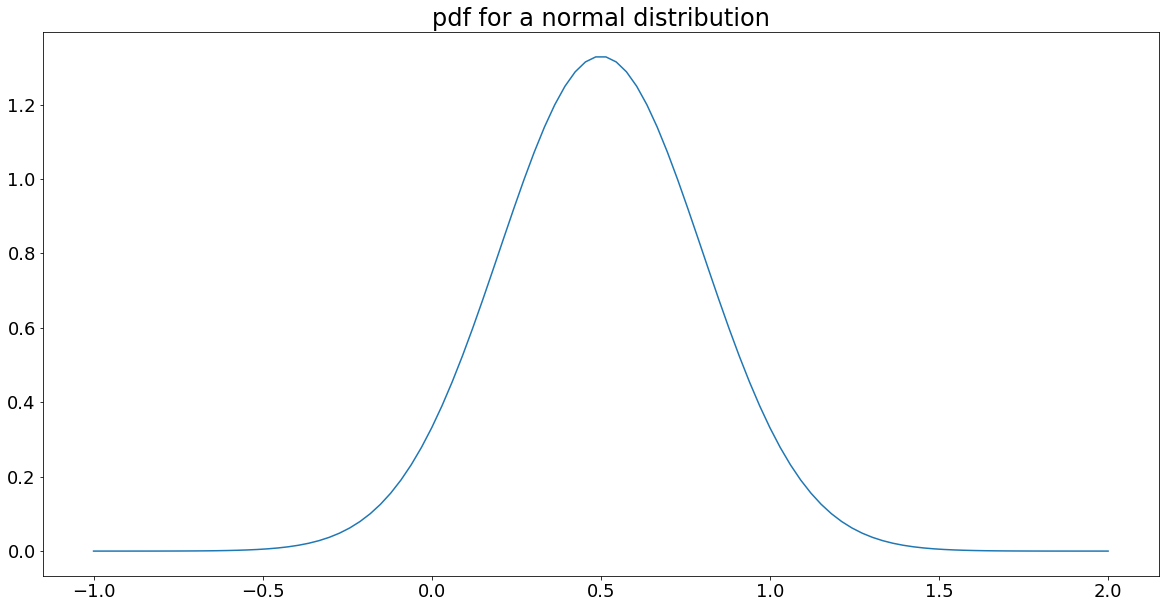

In [229]:
# Set values for mu and sigma
mu = 0.5
sigma = 0.3

# form the distribution
distribution = stats.norm(mu,sigma)

# plot the pdf
x = np.linspace(mu-5*sigma, mu+5*sigma,100)
plt.plot(x, distribution.pdf(x))
plt.title("pdf for a normal distribution")
plt.show()

Note that the **standard normal distribution** has parameters $\mu = 0$ and $\sigma = 1$. The `norm` distribution within `scipy.stats` has these values as defaults, and hence we could have obtained the standard 
distribution by writing `distribution = stats.norm()`.

Later we will see how the normal distribution can be extended to higher-dimensional sample spaces. 

## Cumulative distribution function

Given a probabilty distribution, $P$, on the real line, we can define its **cumulative distribution function** or
**cdf** through

$
F(x) = \int_{-\infty}^{a} p(y) \, \mathrm{d} y,
$

where $p(x)$ is the distribution's pdf. From the cdf, the pdf can be recovered by differentation

$
p = \frac{\mathrm{d} F}{ \mathrm{d} x}.
$

An advantage of the cdf is that it makes certain calculations very easy. For example, from its definition, we
can write

$
P([a,b]) = F(b) - F(a).
$

Thus, if we know the cdf, we can compute the probability for an interval through two function evaluations. 
The `scipy.stats` module contains all common probability distributions, with methods provided for  their
pdfs, cdfs and much more besides. We now plot the cdf for the above normal distribution:

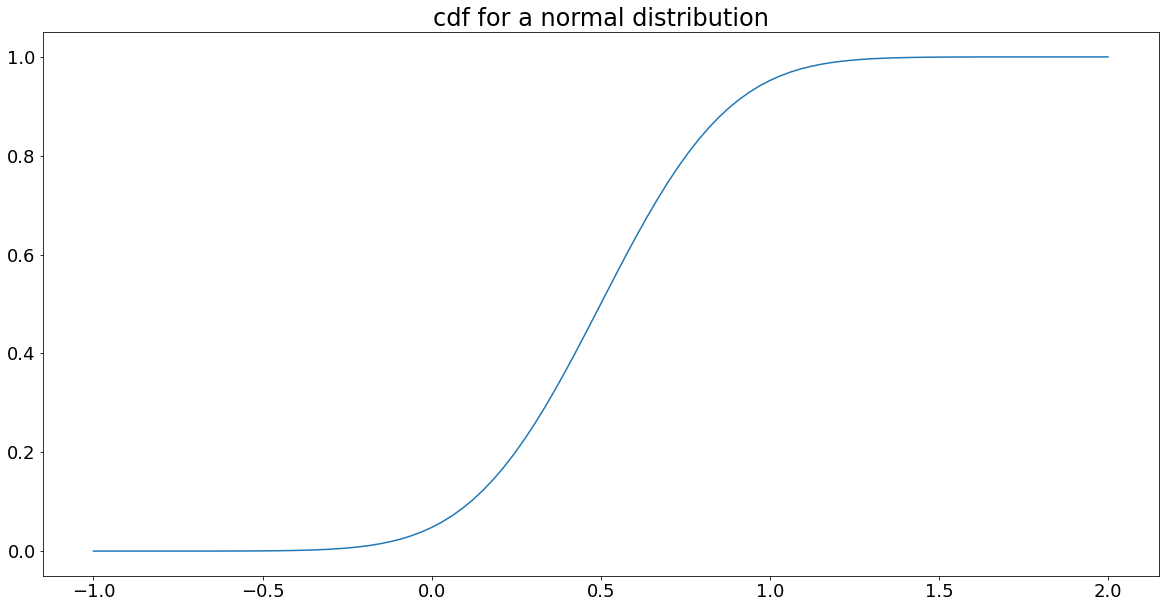

In [230]:
plt.plot(x, distribution.cdf(x))
plt.title("cdf for a normal distribution")
plt.show()

Within the `scipy.stats` module, very many probability distributions are defined, with methods provided
for evaluating their pdfs, cdfs, and other useful quantities. See the documentation at https://docs.scipy.org/doc/scipy/reference/stats.html for  details. 

## Random variables

Consider the following idealised situation. Using a mass spectrometer we  measure two isotope ratios
from a crystal. The measured values can then be put into a formula that returns some quantity of interest, 
such as the age of the sample. If we repeated this process on the same crystal, we expect that 
slightly different isotope ratios would be otained due to random factors, and hence we would find a different age. 
Thus we see that randomness within the results of an experiment is propagated through to any derived quantities. 
**Random variables** are introduced to formalise and work with this idea.  

Given a probability space with distirbution, a random variable is just a real-valued function defined 
on the associated sample space. Let $P$ denote the probability distribution for the space. If $f$ is 
a random variable, then it can be associated with  a probability distribution, $P_{f}$,  in the following manner.
Let $I$ be an interval, and suppose we generate samples from $P$. For each sample, $\mathbf{x}$, we
can evaluate $f(\mathbf{x})$ and can ask whether $f(\mathbf{x}) \in I$.In this manner, we can 
determine a relative frequency for this event, and hence a probability in the hypothetical limit.
We can illusrate this idea practically by drawing random samples from the normal distribution defined above. 

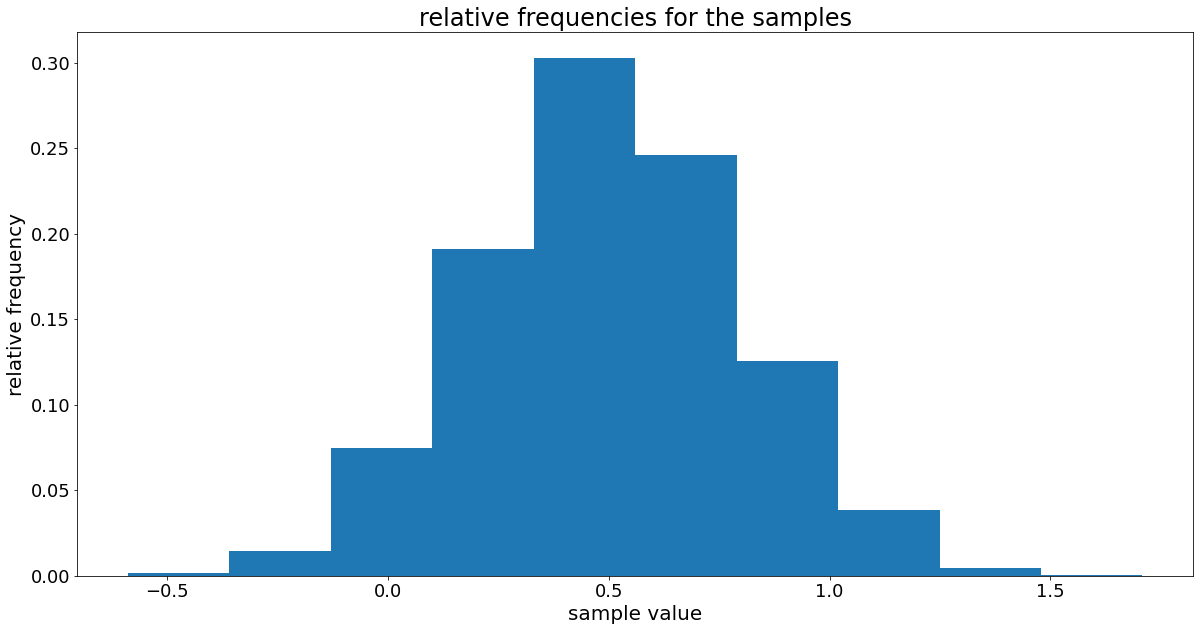

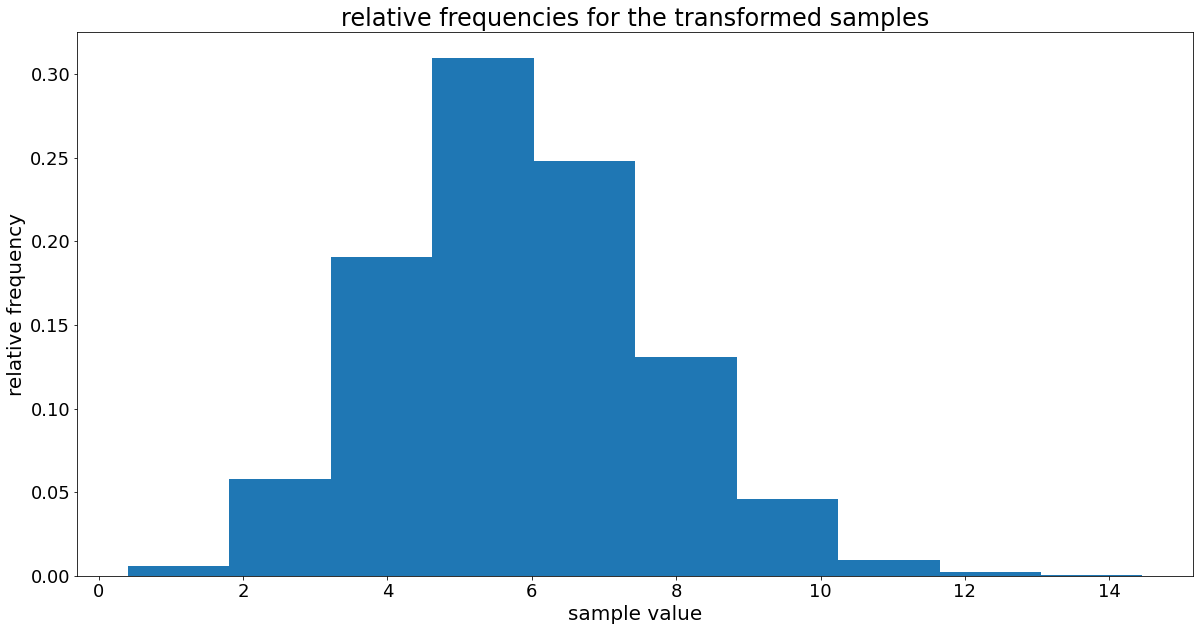

In [231]:
# Draw samples from the normal distribution
nSample = 10000
samples = distribution.rvs(nSample)

# plot a histogram of relative frequencies
plt.hist(samples, weights=np.ones_like(samples) / len(samples))
plt.xlabel("sample value")
plt.ylabel("relative frequency")
plt.title("relative frequencies for the samples")
plt.show()

# define the random variable
def f(x):
    return x*x+5*x+3;

# Transform the samples using this function
transformedSamples = f(samples)

# plot a histogram of the new values
plt.hist(transformedSamples, weights=np.ones_like(transformedSamples) / len(transformedSamples))
plt.xlabel("sample value")
plt.ylabel("relative frequency")
plt.title("relative frequencies for the transformed samples")
plt.show()

